In [7]:
import requests
import pandas as pd
import numpy as np
from network import NeuralNetwork
from model.layers.dense import AdamDense, Dense
from model.activations.activation import *
from model.losses import *
import numpy as np
from influx import get_influx_data



In [85]:
def min_max_scale(column):
    return column / 10000

In [ ]:
try:
    solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
    print("using influx")
except:
    solar = pd.read_csv(f'./data_hourly.csv') 
    print("using csv")
solar["mean_value"] = solar["mean_value"] / 10
solar = solar.dropna()
solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)


url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max&timezone=GMT"


pred = pd.DataFrame(requests.get(url).json()["daily"])
pred["date"] = pd.to_datetime(pred["time"])
pred = pred.drop(["time"], axis=1)
pred["month"] = pred["date"].dt.month
pred["day"] = pred["date"].dt.day
pred["year"] = pred["date"].dt.year
pred = pred.drop(["date"], axis=1)
solar["day"] = solar["time"].dt.day
solar["month"] = solar["time"].dt.month
solar["year"] = solar["time"].dt.year
solar = solar.drop(["time"], axis=1)
data = pd.merge(pred, solar, on=["day", "month", "year"], how="inner")
data = data.drop(["year", "day", "month"], axis=1)
columns_to_scale = data.columns.drop(["mean_value"])  # Exclude 'mean_value' from scaling
data[columns_to_scale] = data[columns_to_scale].apply(min_max_scale)

using csv


KeyError: 'daily'

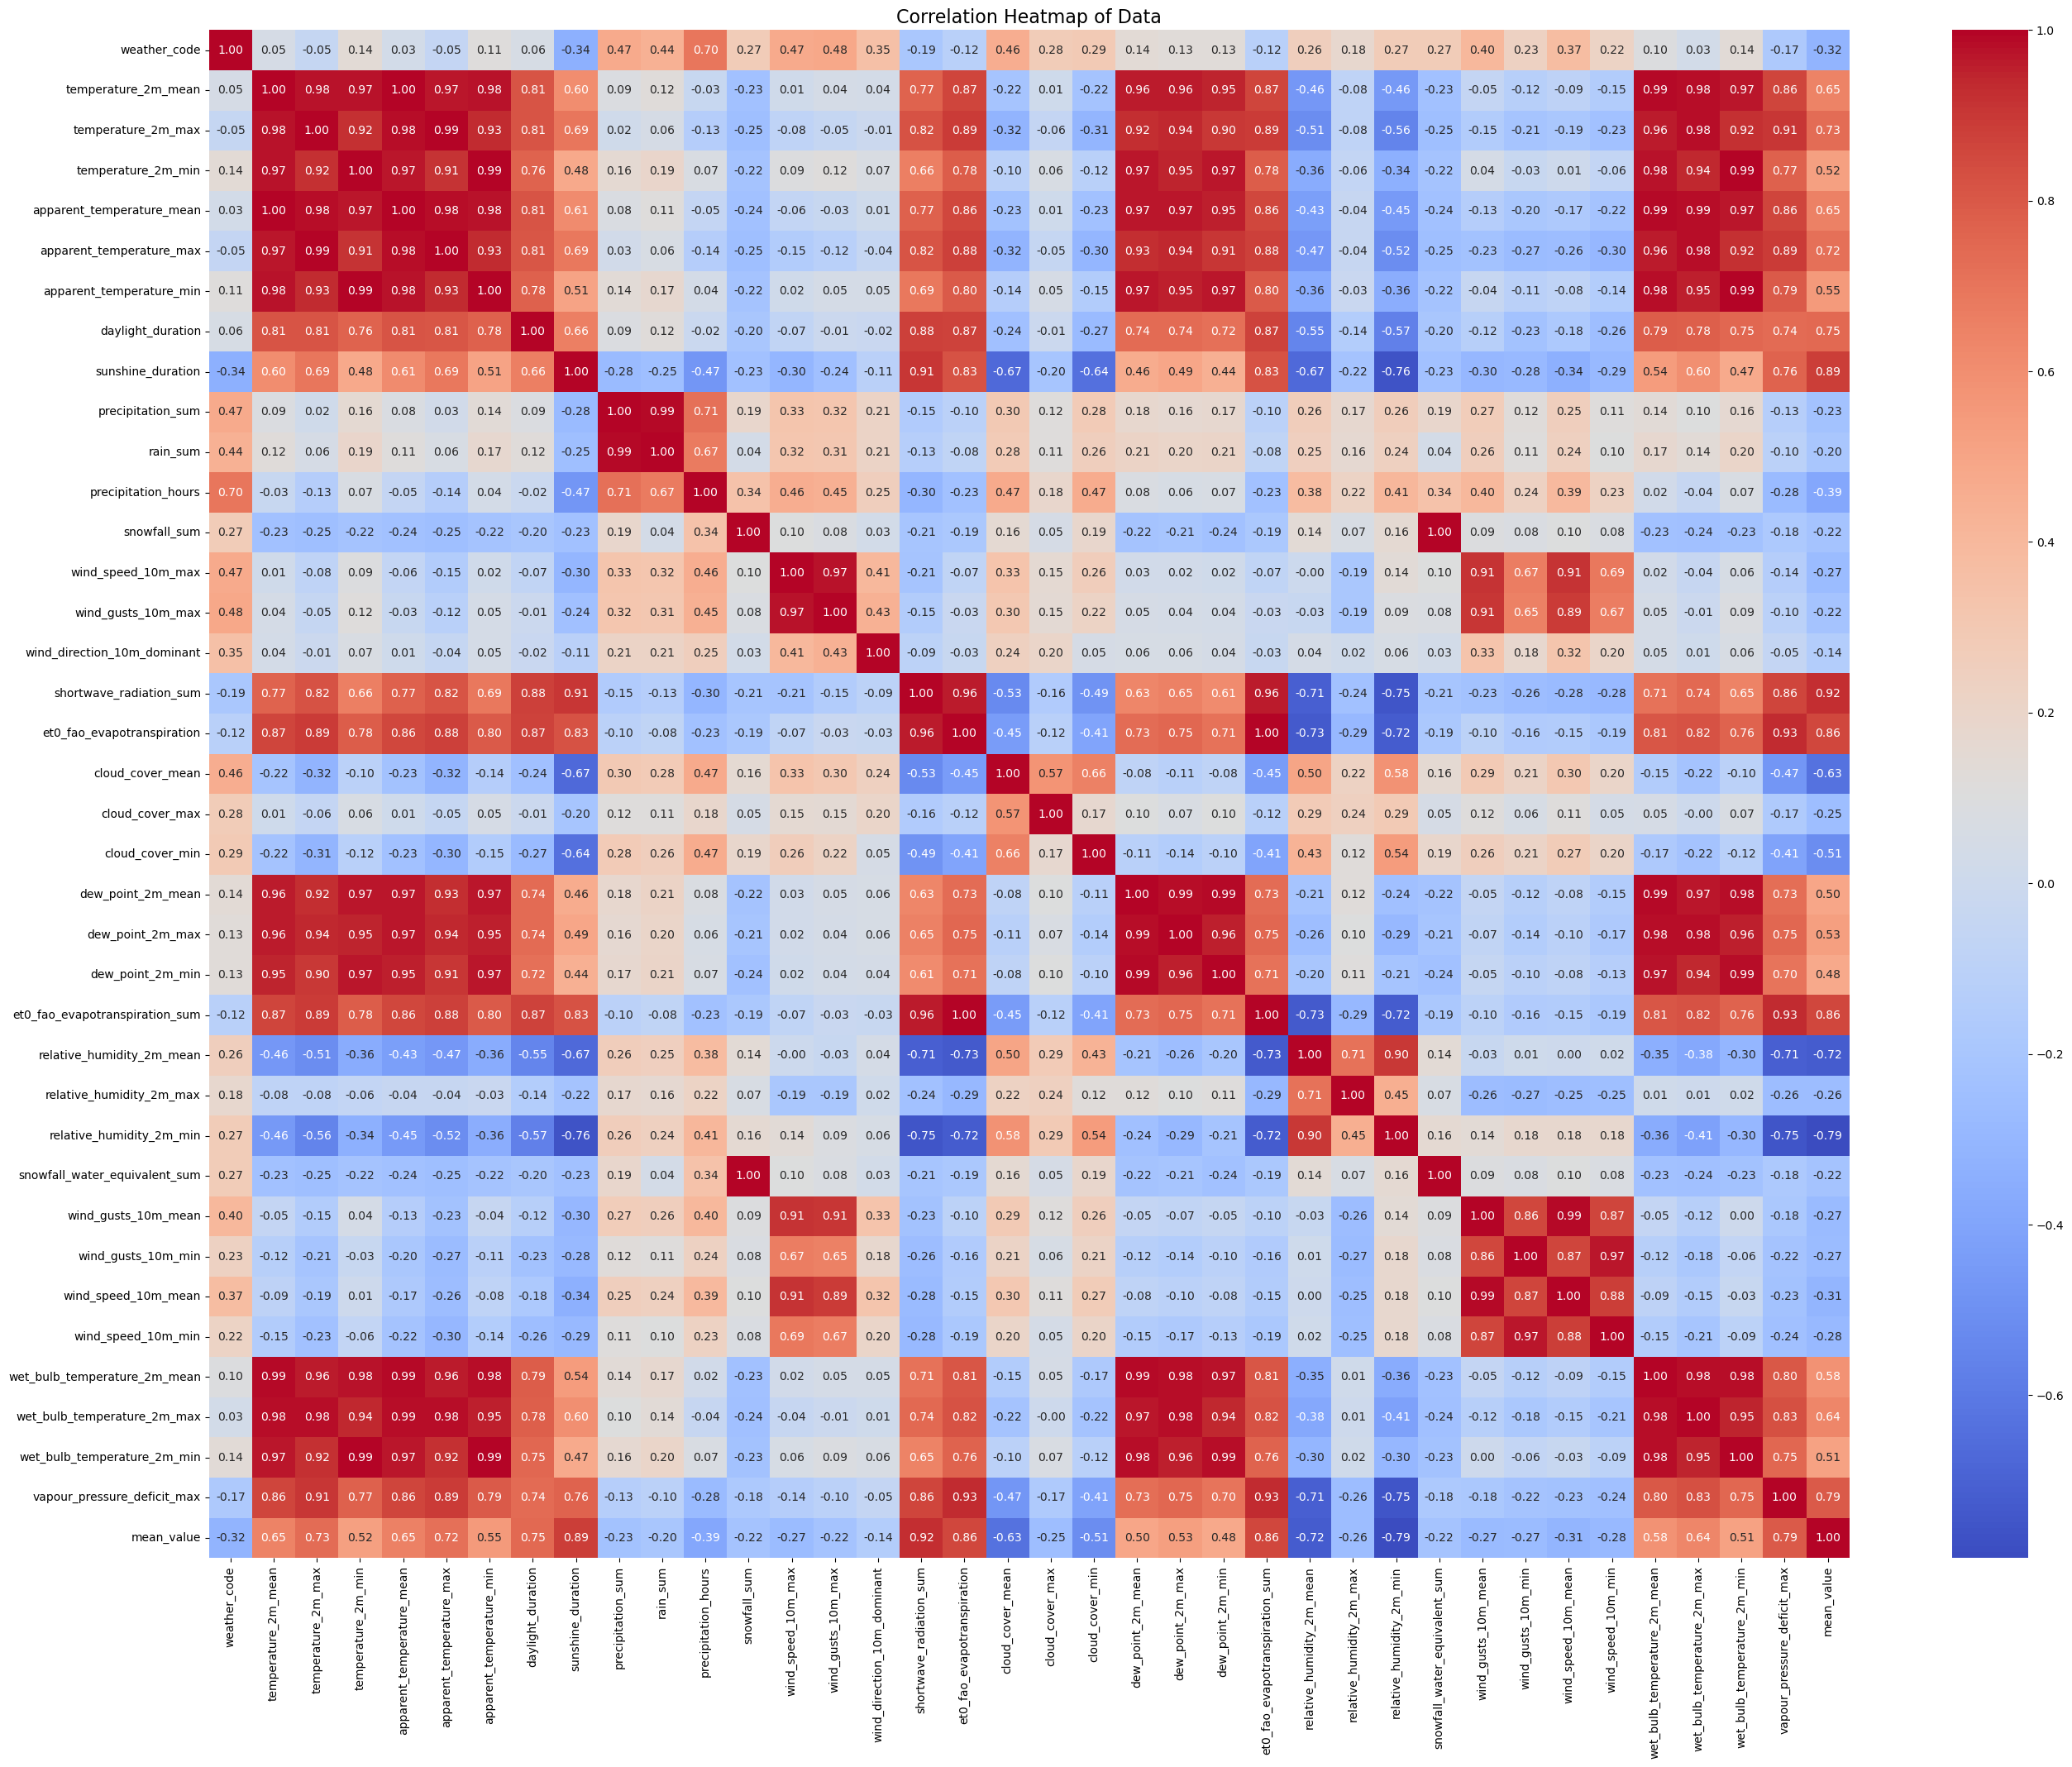

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(32, 24))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Data", fontsize=16)
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
data

,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,mean_value
0,0.0055,0.00222,0.00260,0.00189,0.00222,0.00256,0.00195,5.718743,4.750052,0.00021,0.00021,0.0003,0.0,0.00189,0.00400,0.0247,0.002199,0.000474,0.0060,0.01,0.0006,0.00146,0.00182,0.00100,0.000474,0.0064,0.0088,0.0048,0.0,0.00255,0.00090,0.00116,0.00050,0.00174,0.00192,0.00147,0.000169,0.132
1,0.0053,0.00220,0.00274,0.00175,0.00212,0.00255,0.00164,5.706454,4.252464,0.00012,0.00012,0.0004,0.0,0.00211,0.00475,0.0250,0.002294,0.000553,0.0048,0.01,0.0000,0.00122,0.00165,0.00069,0.000553,0.0058,0.0094,0.0033,0.0,0.00285,0.00079,0.00128,0.00031,0.00162,0.00185,0.00120,0.000242,0.191
2,0.0003,0.00214,0.00278,0.00139,0.00204,0.00278,0.00124,5.693698,4.831205,0.00000,0.00000,0.0000,0.0,0.00137,0.00274,0.0310,0.002552,0.000553,0.0032,0.01,0.0000,0.00089,0.00125,0.00066,0.000553,0.0047,0.0075,0.0029,0.0,0.00171,0.00068,0.00072,0.00020,0.00141,0.00172,0.00107,0.000265,0.197
3,0.0053,0.00209,0.00272,0.00150,0.00202,0.00270,0.00135,5.680477,5.040000,0.00011,0.00011,0.0004,0.0,0.00169,0.00374,0.0245,0.002476,0.000514,0.0054,0.01,0.0000,0.00106,0.00134,0.00076,0.000514,0.0053,0.0075,0.0036,0.0,0.00192,0.00083,0.00079,0.00013,0.00147,0.00177,0.00108,0.000230,0.153
4,0.0051,0.00190,0.00247,0.00138,0.00176,0.00219,0.00128,5.666814,4.230140,0.00005,0.00005,0.0005,0.0,0.00187,0.00389,0.0294,0.002111,0.000463,0.0050,0.01,0.0005,0.00101,0.00148,0.00049,0.000463,0.0061,0.0093,0.0028,0.0,0.00251,0.00094,0.00112,0.00024,0.00138,0.00154,0.00115,0.000224,0.162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0.0003,0.00063,0.00113,0.00019,0.00034,0.00078,-0.00011,4.541920,3.397343,0.00000,0.00000,0.0000,0.0,0.00116,0.00270,0.0032,0.001182,0.000169,0.0054,0.01,0.0000,0.00021,0.00040,0.00007,0.000169,0.0077,0.0095,0.0051,0.0,0.00176,0.00068,0.00077,0.00018,0.00040,0.00063,0.00011,0.000066,0.120
603,0.0003,0.00060,0.00126,-0.00011,0.00033,0.00104,-0.00042,4.563927,4.185246,0.00000,0.00000,0.0000,0.0,0.00101,0.00256,0.0040,0.001907,0.000247,0.0036,0.01,0.0000,0.00014,0.00033,-0.00017,0.000247,0.0075,0.0096,0.0045,0.0,0.00158,0.00058,0.00065,0.00018,0.00035,0.00069,-0.00015,0.000080,0.199
604,0.0051,0.00079,0.00111,0.00048,0.00053,0.00081,0.00029,4.585988,0.757887,0.00016,0.00016,0.0008,0.0,0.00162,0.00338,0.0354,0.000689,0.000135,0.0100,0.01,0.0099,0.00044,0.00074,0.00031,0.000135,0.0079,0.0098,0.0061,0.0,0.00200,0.00018,0.00091,0.00003,0.00058,0.00081,0.00037,0.000051,0.050
605,0.0003,NaN,0.00069,0.00069,NaN,0.00038,0.00038,4.608116,NaN,NaN,NaN,0.0000,NaN,0.00102,0.00241,NaN,NaN,NaN,NaN,0.01,0.0100,NaN,0.00028,0.00028,NaN,NaN,0.0075,0.0075,NaN,NaN,0.00241,NaN,0.00102,NaN,0.00046,0.00046,0.000025,0.103


In [ ]:


# data["month"] = (data['month']).apply(lambda x: abs(1 - abs(x - 6) / 5))
data = data.dropna()

data = data.sample(frac=1)

y = data["mean_value"]
X = data.drop(["mean_value"], axis=1)
X = X.to_numpy()
X =np.reshape(X, (X.shape[0],X.shape[1], 1))
y = np.reshape(y.to_numpy(), (y.shape[0], 1))
# network = [Dense(17,32), Softplus(), AdamDense(32, 64),  NormalizedTanh(),  AdamDense(64, 128),  Tanh(),  AdamDense(128, 1), Softplus()]
# network = [AdamDense(37,64), Softplus(), AdamDense(64, 128),  Tanh(),  AdamDense(128, 32), NormalizedTanh(),  AdamDense(32, 16), Tanh(),  AdamDense(16, 1), Softplus()]
network = [AdamDense(37,32), Softplus(), AdamDense(32, 16),  Tanh(),  AdamDense(16, 8), NormalizedTanh(),  AdamDense(8, 1), Softplus()]
n = NeuralNetwork(network)

trained_n = n.train(mse, mse_prime, X, y, epochs=2000, learning_rate=0.00001, verbose=False)


Complete Validation on 10/2000 epoch, actual=0.0, prediction=0.0, miss=0.0, percentage=0.0%, valid_error=12.268702362063662, error=0.06508356789018843
Complete Validation on 20/2000 epoch, actual=0.0, prediction=0.0, miss=0.0, percentage=0.0%, valid_error=3.384872920817621, error=0.017164201407738233
Complete Validation on 30/2000 epoch, actual=0.0, prediction=0.0, miss=0.0, percentage=0.0%, valid_error=1.2232394596429927, error=0.006138392042835993
Complete Validation on 40/2000 epoch, actual=0.0, prediction=0.0, miss=0.0, percentage=0.0%, valid_error=0.66534294572052, error=0.003556889050850492
Complete Validation on 50/2000 epoch, actual=0.0, prediction=0.0, miss=0.0, percentage=0.0%, valid_error=0.4086755429690316, error=0.002122647081277958
Complete Validation on 60/2000 epoch, actual=0.0, prediction=0.0, miss=0.0, percentage=0.0%, valid_error=0.31587735725574345, error=0.0016629990786384199
Complete Validation on 70/2000 epoch, actual=0.0, prediction=0.0, miss=0.0, percentage=0.0

KeyboardInterrupt: 

7

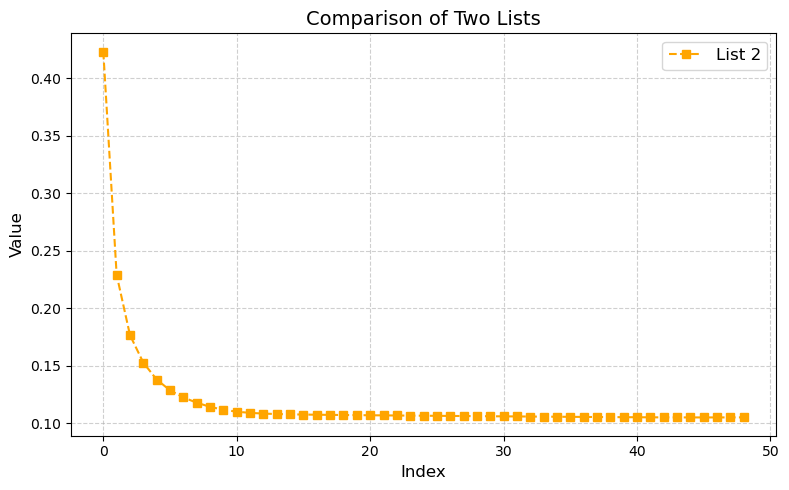

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 5))
# plt.plot([n.error_rate[i] for i in range(len(n.error_rate)) if i == 0 or i % 10 == 0], label='List 1', marker='o', linestyle='-', color='blue')
plt.plot(n.real_error[2:], label='List 2', marker='s', linestyle='--', color='orange')

# Add title and labels
plt.title('Comparison of Two Lists', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [1]:
from daily import train
import inspect
lines = inspect.getsource(train)
print(lines)

def train():
    try:
        solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
        print("using influx", flush=True)
    except:
        solar = pd.read_csv('./data_daily.csv') 
        print("using csv", flush=True)
    solar["mean_value"] = solar["mean_value"] / 100
    solar = solar.dropna()
    solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)

    url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cl

In [2]:
train()

using csv
Complete Validation on 10/2000 epoch, actual=953.0, prediction=2623.0, miss=1732.0, percentage=1148.0%, valid_error=10.09033410273273, error=0.0665266914572584
Complete Validation on 20/2000 epoch, actual=953.0, prediction=1309.0, miss=630.0, percentage=457.0%, valid_error=1.147067387813094, error=0.007781326949711892
Complete Validation on 30/2000 epoch, actual=953.0, prediction=1146.0, miss=326.0, percentage=281.0%, valid_error=0.30322667613297627, error=0.002102812781842014
Complete Validation on 40/2000 epoch, actual=953.0, prediction=1074.0, miss=251.0, percentage=218.0%, valid_error=0.16916357217279024, error=0.0011318487226074673
Complete Validation on 50/2000 epoch, actual=953.0, prediction=1044.0, miss=228.0, percentage=194.0%, valid_error=0.13500914998311114, error=0.0008913800300167719
Complete Validation on 60/2000 epoch, actual=953.0, prediction=1029.0, miss=218.0, percentage=180.0%, valid_error=0.12134566324188378, error=0.0007764192270542854
Complete Validation

KeyboardInterrupt: 